In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image


In [ ]:
train_dir='/content/drive/MyDrive/dataset/train'
val_dir='/content/drive/MyDrive/dataset/test'

In [ ]:
batch_size = 32
img_height = 250
img_width = 250
train_data=tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_data=tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 700 files belonging to 2 classes.
Found 317 files belonging to 2 classes.


In [ ]:
class_names=train_data.class_names

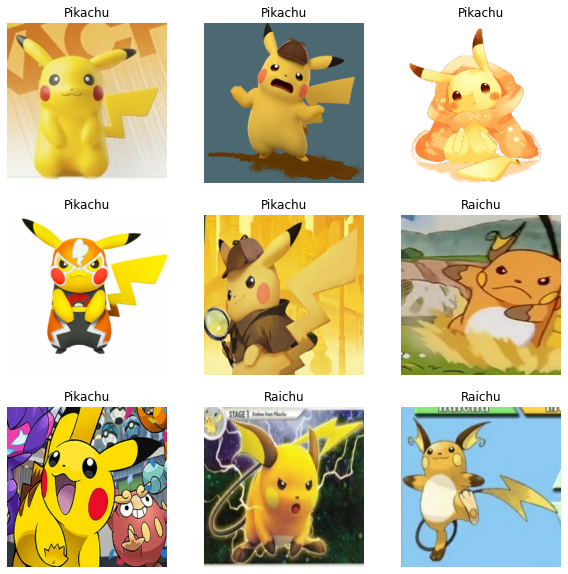

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Data Augmentation**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",  input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ])

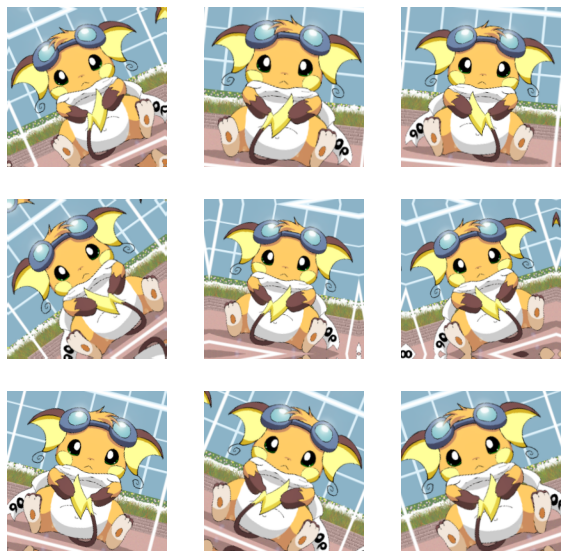

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = 2

# defining model
model = tf.keras.Sequential([
    data_augmentation, 
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),                         
    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(64, (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(128 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(256 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, seed = 5),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(num_classes , activation = 'sigmoid')])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 250, 250, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 246, 246, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 82, 82, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 78, 78, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)      

In [ ]:
history = model.fit(train_data,validation_data=val_data,epochs=15)

Epoch 1/15
22/22 [==============================] - 9s 338ms/step - loss: 0.3716 - accuracy: 0.8343 - val_loss: 0.3612 - val_accuracy: 0.8423
Epoch 2/15
22/22 [==============================] - 9s 333ms/step - loss: 0.3551 - accuracy: 0.8471 - val_loss: 0.4205 - val_accuracy: 0.7950
Epoch 3/15
22/22 [==============================] - 9s 336ms/step - loss: 0.3354 - accuracy: 0.8543 - val_loss: 0.4127 - val_accuracy: 0.8044
Epoch 4/15
22/22 [==============================] - 10s 342ms/step - loss: 0.2987 - accuracy: 0.8771 - val_loss: 0.3449 - val_accuracy: 0.8454
Epoch 5/15
22/22 [==============================] - 10s 338ms/step - loss: 0.3373 - accuracy: 0.8629 - val_loss: 0.3386 - val_accuracy: 0.8549
Epoch 6/15
22/22 [==============================] - 9s 335ms/step - loss: 0.2817 - accuracy: 0.8814 - val_loss: 0.3554 - val_accuracy: 0.8423
Epoch 7/15
22/22 [==============================] - 9s 336ms/step - loss: 0.2554 - accuracy: 0.8857 - val_loss: 0.3984 - val_accuracy: 0.8517
Epoc

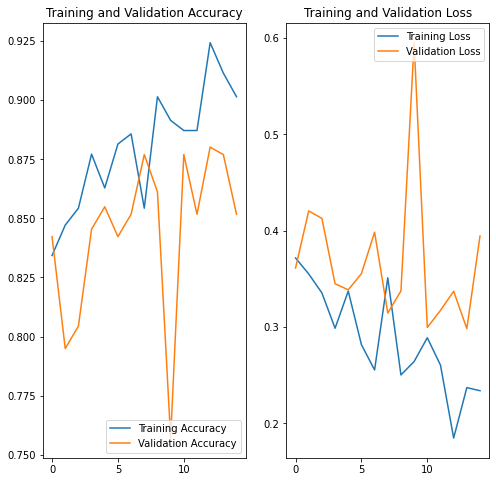

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This image most likely belongs to Pikachu with a 69.34 percent confidence.




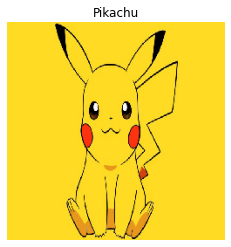

In [ ]:
test_path = '/content/drive/MyDrive/dataset/check/001.jpg'
img = tf.keras.preprocessing.image.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print("\n")
plt.title(class_names[np.argmax(score)])
plt.axis('off')
_=plt.imshow(img)